In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [26]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_SS = pd.read_csv('sample_submission.csv')

In [27]:
df_train.dropna(inplace=True)
df_train = pd.get_dummies(df_train)
df_test.dropna(inplace=True)
df_test = pd.get_dummies(df_test)

In [28]:
X_features= df_train.columns.to_numpy()
TGC = X_features[1:21]
X_features2 = df_test.columns.to_numpy()
TGC2 = X_features2[1:21]

In [29]:
#X = df_train.drop(TGC, axis=1)
X=df_train[TGC]
y = df_train['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_test = df_test.drop(TGC1, axis=1)
#X_new=df_test(TGC2, axis=1)
X_new = df_test[TGC2]

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_norm = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_new_scaled= scaler.fit_transform(X_new)

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0004029842922712043


In [36]:
from sklearn.metrics import r2_score

# Calculate R-squared (coefficient of determination) to measure model performance
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.844978582903995


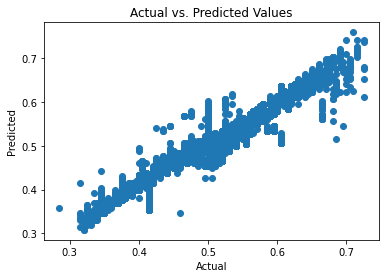

In [37]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()


In [38]:
y_pred2 = lr_model.predict(X_new_scaled)

In [39]:
nn=y_pred2.shape[0]
ar=np.arange(0, nn)
sam_sub=np.column_stack((ar, y_pred2))

In [40]:
print(sam_sub)

[[0.00000000e+00 5.73415126e-01]
 [1.00000000e+00 4.55133922e-01]
 [2.00000000e+00 4.54661730e-01]
 ...
 [7.45302000e+05 6.24135904e-01]
 [7.45303000e+05 5.50831894e-01]
 [7.45304000e+05 5.11361540e-01]]


In [41]:
#sam_sub_df= pd.DataFrame(sam_sub, columns=['ID', 'FloodProbability'])
#sam_sub_df.to_csv('sam_sub.csv', index=False)

#print("CSV file created successfully!")

In [42]:
tera=np.column_stack((df_test['id'], y_pred2))

In [43]:
print(tera)

[[1.11795700e+06 5.73415126e-01]
 [1.11795800e+06 4.55133922e-01]
 [1.11795900e+06 4.54661730e-01]
 ...
 [1.86325900e+06 6.24135904e-01]
 [1.86326000e+06 5.50831894e-01]
 [1.86326100e+06 5.11361540e-01]]
